# Zadatak 1.
Za mtcars skup podataka (nalazi se rusu_lv_2019_20/LV3/resources) napišite programski kod koji će
odgovoriti na sljedeća pitanja:
1. Kojih 5 automobila ima najveću potrošnju? (koristite funkciju sort)
2. Koja tri automobila s 8 cilindara imaju najmanju potrošnju?
3. Kolika je srednja potrošnja automobila sa 6 cilindara?
4. Kolika je srednja potrošnja automobila s 4 cilindra mase između 2000 i 2200 lbs?
5. Koliko je automobila s ručnim, a koliko s automatskim mjenjačem u ovom skupu podataka?
6. Koliko je automobila s automatskim mjenjačem i snagom preko 100 konjskih snaga?
7. Kolika je masa svakog automobila u kilogramima?

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [378]:
mtcars = pd.read_csv('/content/resources/mtcars.csv', header=0)
print(mtcars)

                    car   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.

In [379]:
print("Automobili s najvecom potrosnjom")
print(mtcars.sort_values(by=['mpg']).head(5).car)

Automobili s najvecom potrosnjom
15    Lincoln Continental
14     Cadillac Fleetwood
23             Camaro Z28
6              Duster 360
16      Chrysler Imperial
Name: car, dtype: object


In [380]:
print("Tri automobila s 8 cilindara koji imaju najmanju potrosnju")
print(mtcars[mtcars['cyl'] == 8].sort_values(by=['mpg'],ascending=False).head(3).car)

Tri automobila s 8 cilindara koji imaju najmanju potrosnju
24     Pontiac Firebird
4     Hornet Sportabout
12           Merc 450SL
Name: car, dtype: object


In [381]:
print("Srednja potrosnja automobila sa 6 cilindara")
print(mtcars[mtcars['cyl'] == 6].mean(numeric_only=True).mpg, "mpg")

Srednja potrosnja automobila sa 6 cilindara
19.74285714285714 mpg


In [382]:
print("Srednja potrosnja automobila s 4 cilindra mase izmedju 2000 i 2200 lbs")
print(mtcars[(mtcars['cyl'] == 4) & (mtcars['wt'].between(2.0,2.2))].mean(numeric_only=True).mpg, "mpg")

Srednja potrosnja automobila s 4 cilindra mase izmedju 2000 i 2200 lbs
29.2 mpg


In [383]:
print("Broj automobila s rucnim i s automatskim mjenjacem")
print("Rucni:", mtcars['am'].value_counts()[1])
print("Automatski:", mtcars['am'].value_counts()[0])

Broj automobila s rucnim i s automatskim mjenjacem
Rucni: 13
Automatski: 19


In [384]:
print("Broj automobila s automatskim mjenjacem i preko 100 konjskih snaga")
print(len(mtcars[(mtcars['hp'] > 100) & (mtcars['am'] == 0)]))

Broj automobila s automatskim mjenjacem i preko 100 konjskih snaga
16


In [385]:
print("Masa svakog automobila u kilogramima")
mtcars['wt'] = ((mtcars['wt'] * 1000) / 2.2)
print(mtcars[['car','wt']])

Masa svakog automobila u kilogramima
                    car           wt
0             Mazda RX4  1190.909091
1         Mazda RX4 Wag  1306.818182
2            Datsun 710  1054.545455
3        Hornet 4 Drive  1461.363636
4     Hornet Sportabout  1563.636364
5               Valiant  1572.727273
6            Duster 360  1622.727273
7             Merc 240D  1450.000000
8              Merc 230  1431.818182
9              Merc 280  1563.636364
10            Merc 280C  1563.636364
11           Merc 450SE  1850.000000
12           Merc 450SL  1695.454545
13          Merc 450SLC  1718.181818
14   Cadillac Fleetwood  2386.363636
15  Lincoln Continental  2465.454545
16    Chrysler Imperial  2429.545455
17             Fiat 128  1000.000000
18          Honda Civic   734.090909
19       Toyota Corolla   834.090909
20        Toyota Corona  1120.454545
21     Dodge Challenger  1600.000000
22          AMC Javelin  1561.363636
23           Camaro Z28  1745.454545
24     Pontiac Firebird  1747.727273
2

# Zadatak 2.
Napišite programski kod koji će iscrtati sljedeće slike za mtcars skup podataka:
1. Pomoću barplot-a prikažite na istoj slici potrošnju automobila s 4, 6 i 8 cilindara.
2. Pomoću boxplot-a prikažite na istoj slici distribuciju težine automobila s 4, 6 i 8 cilindara.
3. Pomoću odgovarajućeg grafa pokušajte odgovoriti na pitanje imaju li automobili s ručnim mjenjačem veću
potrošnju od automobila s automatskim mjenjačem?
4. Prikažite na istoj slici odnos ubrzanja i snage automobila za automobile s ručnim odnosno automatskim
mjenjačem.

In [386]:
import matplotlib.pyplot as plt

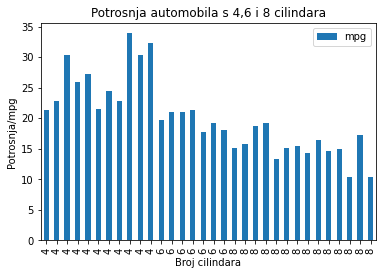

In [387]:
#  1.
ax = mtcars.sort_values(by='cyl').plot(x="cyl", y='mpg', kind='bar', title='Potrosnja automobila s 4,6 i 8 cilindara')
ax.set_ylabel('Potrosnja/mpg')
ax.set_xlabel('Broj cilindara')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


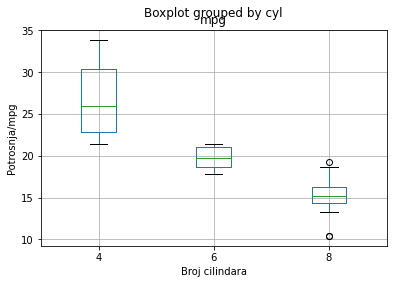

In [388]:
# 2.
ax = mtcars.sort_values(by='cyl').boxplot(by='cyl',column='mpg')
ax.set_ylabel('Potrosnja/mpg')
ax.set_xlabel('Broj cilindara')
plt.show()

Automobili s rucnim mjenjacem imaju vecu potrosnju


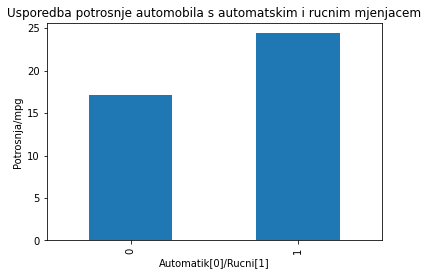

In [389]:
# 3.
ax = mtcars.groupby('am').mpg.mean().plot(kind='bar', title="Usporedba potrosnje automobila s automatskim i rucnim mjenjacem")
ax.set_ylabel('Potrosnja/mpg')
ax.set_xlabel('Automatik[0]/Rucni[1]')
print('Automobili s rucnim mjenjacem imaju vecu potrosnju')
plt.show()

In [390]:
# 4.

fig, ax = plt.subplots()

mtcars.set_index('am').sort_values(by='hp').groupby('am').plot(x='hp', y='qsec', ax=ax)
ax.legend(['Automatic','Manual'])

plt.show()

# Zadatak 3.
Na stranici http://iszz.azo.hr/iskzl/exc.htm moguće je dohvatiti podatke o kvaliteti zraka za Republiku Hrvatsku. Podaci
se mogu preuzeti korištenjem RESTfull servisa u XML ili JSON obliku. U rusu_lv_2019_20/LV3/resources/
skriptu koja dohvaća podatke te ih pohranjuje u odgovarajući DataFrame. Prepravite/nadopunite skriptu s
programskim kodom kako bi dobili sljedeće rezultate:
1. Dohvaćanje mjerenja dnevne koncentracije lebdećih čestica PM10 za 2017. godinu za grad Osijek.
2. Ispis tri datuma u godini kada je koncentracija PM10 bila najveća.
3. Pomoću barplot prikažite ukupni broj izostalih vrijednosti tijekom svakog mjeseca.
4. Pomoću boxplot usporedite PM10 koncentraciju tijekom jednog zimskog i jednog ljetnog mjeseca.
5. Usporedbu distribucije PM10 čestica tijekom radnih dana s distribucijom čestica tijekom vikenda.

In [391]:
import requests
import json
import xml.etree.ElementTree as ET
import time
import urllib.request

In [392]:
# url that contains valid xml file:
url = 'http://iszz.azo.hr/iskzl/rs/podatak/export/xml?postaja=160&polutant=5&tipPodatka=5&vrijemeOd=02.01.2017&vrijemeDo=12.12.2017'

airQualityHR = urllib.request.urlopen(url).read()
root = ET.fromstring(airQualityHR)

df = pd.DataFrame(columns=('mjerenje', 'vrijeme'))

i = 0
children = list(root) 
while True:
    
    try:
        obj = list(children[i])
        # obj = root.getchildren()[i].getchildren()
    except:
        break
    
    row = dict(zip(['mjerenje', 'vrijeme'], [obj[0].text, obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
    df.mjerenje[i] = float(df.mjerenje[i])
    i = i + 1

df.vrijeme = pd.to_datetime(df['vrijeme'], utc=True)
ax = df.plot(y='mjerenje', x='vrijeme');
ax.set_ylabel('\u03BCg/m3')

# add date month and day designator
df['month'] = pd.to_datetime(df['vrijeme']).dt.month
df['dayOfweek'] = pd.to_datetime(df['vrijeme']).dt.weekday

print(df)


    mjerenje                   vrijeme  month  dayOfweek
0    101.146 2017-01-01 23:00:00+00:00      1          6
1      43.47 2017-01-02 23:00:00+00:00      1          0
2     49.025 2017-01-03 23:00:00+00:00      1          1
3     32.813 2017-01-04 23:00:00+00:00      1          2
4     22.541 2017-01-05 23:00:00+00:00      1          3
..       ...                       ...    ...        ...
333   38.229 2017-12-07 23:00:00+00:00     12          3
334   12.723 2017-12-08 23:00:00+00:00     12          4
335   19.241 2017-12-09 23:00:00+00:00     12          5
336   13.127 2017-12-10 23:00:00+00:00     12          6
337   29.668 2017-12-11 23:00:00+00:00     12          0

[338 rows x 4 columns]


In [393]:
# 2.

print("\n\n### Datumi s najvecom koncentracijom PM10 ###\n")
print(df.sort_values(by=['mjerenje'], ascending=False).head(3)['vrijeme'])



### Datumi s najvecom koncentracijom PM10 ###

20   2017-01-21 23:00:00+00:00
19   2017-01-20 23:00:00+00:00
28   2017-01-29 23:00:00+00:00
Name: vrijeme, dtype: datetime64[ns, UTC]


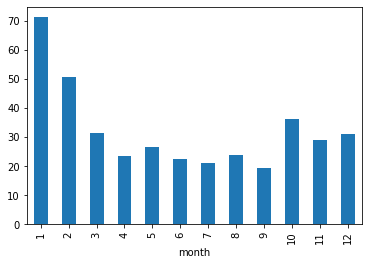

In [394]:
# 3.

temp = df.groupby('month').mjerenje.mean().plot(kind='bar', x='month')
plt.show()

    mjerenje                   vrijeme  month  dayOfweek
0    101.146 2017-01-01 23:00:00+00:00      1          6
1      43.47 2017-01-02 23:00:00+00:00      1          0
2     49.025 2017-01-03 23:00:00+00:00      1          1
3     32.813 2017-01-04 23:00:00+00:00      1          2
4     22.541 2017-01-05 23:00:00+00:00      1          3
..       ...                       ...    ...        ...
238   15.601 2017-08-27 22:00:00+00:00      8          6
239   14.567 2017-08-28 22:00:00+00:00      8          0
240    21.42 2017-08-29 22:00:00+00:00      8          1
241   32.829 2017-08-30 22:00:00+00:00      8          2
242   38.415 2017-08-31 22:00:00+00:00      8          3

[62 rows x 4 columns]


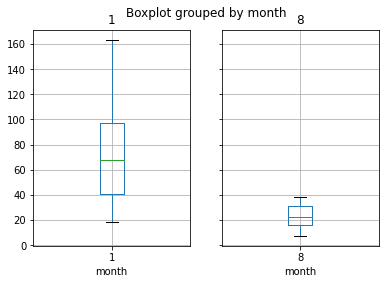

In [395]:
# 4.

print( df[(df['month'] == 8) | (df['month'] == 1)])
 
df[(df['month'] == 8) | (df['month'] == 1)].groupby(by='month').boxplot(by='month',column='mjerenje')
plt.show()

    mjerenje                   vrijeme  month  dayOfweek  weekend
0    101.146 2017-01-01 23:00:00+00:00      1          6     True
1      43.47 2017-01-02 23:00:00+00:00      1          0    False
2     49.025 2017-01-03 23:00:00+00:00      1          1    False
3     32.813 2017-01-04 23:00:00+00:00      1          2    False
4     22.541 2017-01-05 23:00:00+00:00      1          3    False
..       ...                       ...    ...        ...      ...
333   38.229 2017-12-07 23:00:00+00:00     12          3    False
334   12.723 2017-12-08 23:00:00+00:00     12          4    False
335   19.241 2017-12-09 23:00:00+00:00     12          5     True
336   13.127 2017-12-10 23:00:00+00:00     12          6     True
337   29.668 2017-12-11 23:00:00+00:00     12          0    False

[338 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


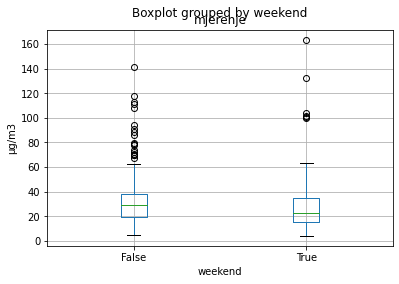

In [396]:
# 5.
df['weekend'] = df.dayOfweek >= 5
print(df)
 
ax = df[(df['weekend'] == True) | (df['weekend'] == False)].boxplot(by='weekend',column='mjerenje')
ax.set_ylabel('\u03BCg/m3')
plt.show()